In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

from fastai2.metrics import RocAuc
from fastai2.vision.all import *



In [8]:
dblock = DataBlock(get_x = lambda r: f"data/jpeg/train{r['image_name']}",
                  get_y = lambda r : r["target"],)

train_df = pd.read_csv('data/train.csv')

train_df.target.value_counts()

train_df = train_df.sample(n = 1000)

dblock = DataBlock((ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(0.3,42),
                   get_x = lambda r: f"data/jpeg/train/{r['image_name']}.jpg",
                   get_y = lambda r : str(r["target"]),
                   item_tfms = Resize(size=224))


dls = dblock.dataloaders(train_df,bs=128)

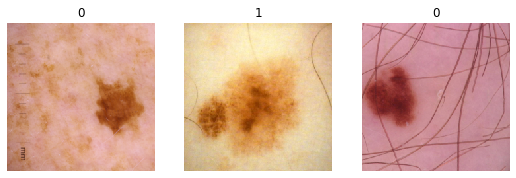

In [9]:
dls.show_batch(nrows=1, ncols=3)

In [11]:
learn = cnn_learner(dls, resnet18)

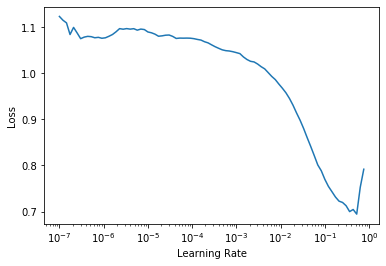

In [65]:
output = learn.lr_find(num_it=100)

In [66]:
print(output)

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.05754399299621582)


In [12]:
learn.fit_one_cycle(n_epoch=6, lr=5e-2)

epoch,train_loss,valid_loss,time
0,1.045181,1.102828,04:05
1,1.009149,0.841568,04:15
2,0.979844,0.669086,04:23
3,0.954485,0.641952,03:06
4,0.925379,0.620657,02:17
5,0.907805,0.626170,02:07


In [13]:
learn.save('fit-one-cycle-6-epochs')

In [14]:
from fasround_multiplei2 import metrics

In [15]:
metrics??

Type:        module
String form: <module 'fastai2.metrics' from '/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/fastai2/metrics.py'>
File:        ~/anaconda3/envs/python3/lib/python3.6/site-packages/fastai2/metrics.py
Source:     
# AUTOGENERATED! DO NOT EDIT! File to edit: nbs/13b_metrics.ipynb (unless otherwise specified).

__all__ = ['AccumMetric', 'skm_to_fastai', 'optim_metric', 'accuracy', 'error_rate', 'top_k_accuracy', 'APScore',
           'BalancedAccuracy', 'BrierScore', 'CohenKappa', 'F1Score', 'FBeta', 'HammingLoss', 'Jaccard', 'Precision',
           'Recall', 'RocAuc', 'Perplexity', 'perplexity', 'accuracy_multi', 'APScoreMulti', 'BrierScoreMulti',
           'F1ScoreMulti', 'FBetaMulti', 'HammingLossMulti', 'JaccardMulti', 'MatthewsCorrCoefMulti', 'PrecisionMulti',
           'RecallMulti', 'RocAucMulti', 'mse', 'rmse', 'mae', 'msle', 'exp_rmspe', 'ExplainedVariance', 'R2Score',
           'foreground_acc', 'Dice', 'JaccardCoeff', 'LossMetric', 'LossM